# ***Done By: Yasmeen Toukhy***

# ***GRIP_Internship : Data Science & Business Analytics***

    * Task 2 :: Prediction using Unsupervised ML
    * Task 6 :: Prediction using decision tree algorithm

* Both tasks has the same dataset thats why I added them together



# Analyze Data given in DataSet

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
Iris_DataSet = pd.read_csv("Iris.csv")
print(f"Dataset are {len(Iris_DataSet)} rows")

Dataset are 150 rows


In [176]:
Iris_DataSet.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [177]:
Iris_DataSet.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [178]:
Iris_DataSet.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [179]:
Iris_DataSet.isnull().sum() #Check if there is any data that has null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [180]:
print (Iris_DataSet.shape,"\n")
print(Iris_DataSet["Species"].unique(),"\n")
print (Iris_DataSet.info())

(150, 6) 

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


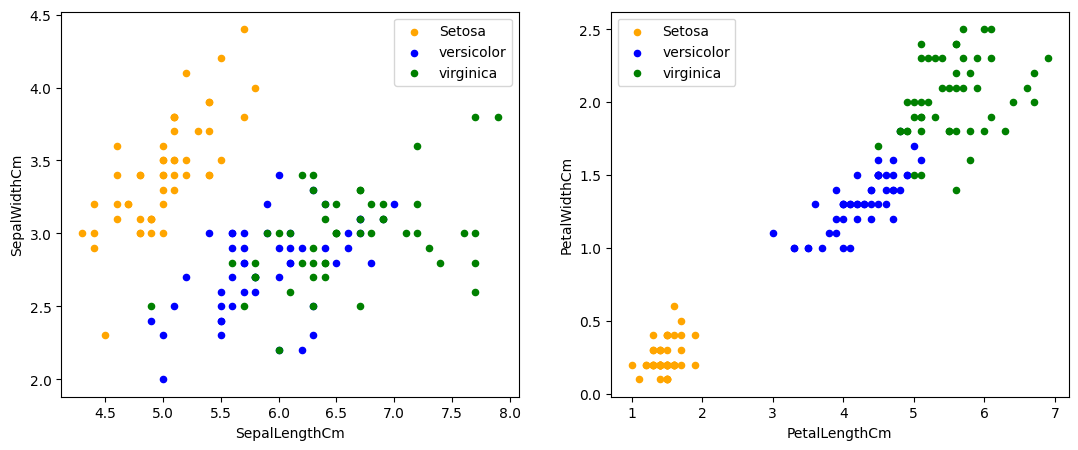

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(13,5)

Iris_DataSet[Iris_DataSet.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa', ax = ax1)
Iris_DataSet[Iris_DataSet.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=ax1)
Iris_DataSet[Iris_DataSet.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax1)

Iris_DataSet[Iris_DataSet.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa', ax = ax2)
Iris_DataSet[Iris_DataSet.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=ax2)
Iris_DataSet[Iris_DataSet.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=ax2)

plt.show()

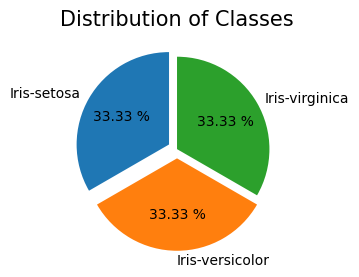

In [182]:
count_list = [(Iris_DataSet.Species == 'Iris-setosa').sum(), (Iris_DataSet.Species == 'Iris-versicolor').sum(), (Iris_DataSet.Species == 'Iris-virginica').sum()]
label_list = list(Iris_DataSet['Species'].unique())
plt.figure(figsize = (3,3))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 10})
plt.title('Distribution of Classes', fontsize = 15)
plt.show()

# Processing DataSet

In [183]:
dataset = Iris_DataSet.replace(to_replace ="Iris-setosa",value ="0")
dataset = dataset.replace(to_replace ="Iris-versicolor",value ="1")
dataset = dataset.replace(to_replace ="Iris-virginica",value ="2")
print(dataset["Species"].unique(),"\n")
x = dataset.iloc[:, [1, 2, 3, 4]].values
y = dataset.iloc[:, 5].values.astype(int)

['0' '1' '2'] 



In [184]:
X = np.array(dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) # Input Features
Y = np.array(dataset["Species"])  #output class

# Task 2 :: Prediction using Unsupervised ML
# To Do :: predict the Optimum no. of clusters & represent it

In [185]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

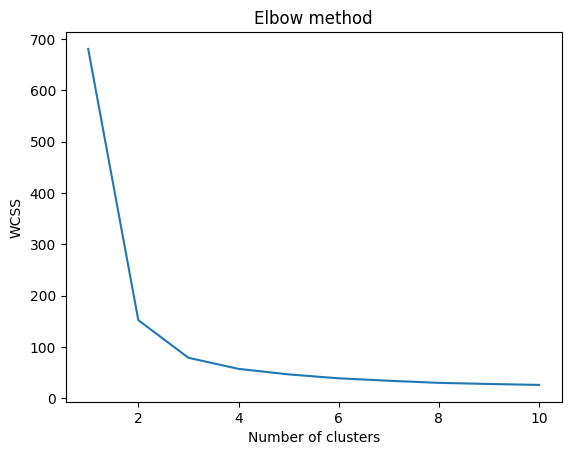

In [186]:
#Finding the optimum number of clusters for k-means classification

wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Plotting the results onto a line graph -> allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [187]:
#Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(x)

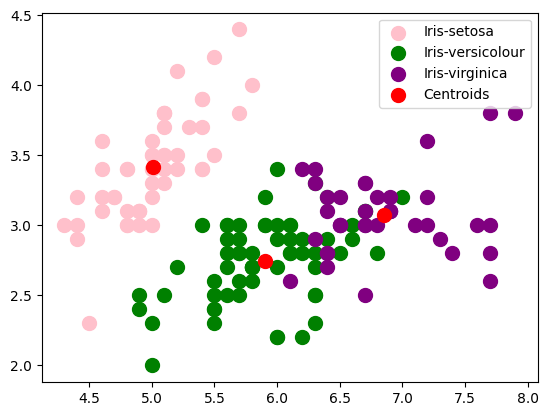

In [188]:
#Visualizing the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'purple', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [189]:
cm = confusion_matrix(y, y_kmeans)
cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [190]:
print("Classification Report : ")
print("------------------------")

print (classification_report(y, y_kmeans))

Classification Report : 
------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# Task 6 :: Prediction using decision tree algorithm



Model Entropy

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from graphviz import Source
from sklearn import tree
from IPython.display import SVG

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [193]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                                     max_depth =4,                  # Max Height of Tree
                                     min_samples_leaf =4,           # Max Leaf samples
                                     random_state = 100)

In [194]:
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       random_state=100)

In [195]:
y_pred_entropy = clf_entropy.predict(X_test)

In [196]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_entropy)*100)
print ("Report:",  classification_report(Y_test, y_pred_entropy))

Accuracy :  93.33333333333333
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      0.92      0.92        12
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [197]:
cm_entropy = confusion_matrix(Y_test, y_pred_entropy)
cm_entropy

array([[11,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  6]])

In [198]:
X_dataset= dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # Input Features
Y_dataset= dataset.Species #output class

In [199]:
from graphviz import Source
from sklearn import tree
from IPython.display import SVG

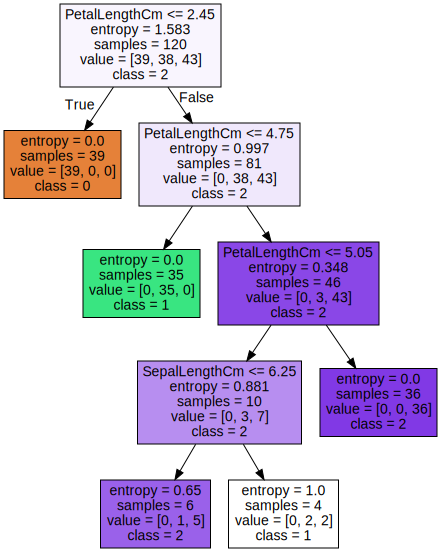

In [200]:
labels = X_dataset.columns
graph = Source(tree.export_graphviz(clf_entropy ,feature_names = labels, class_names = Y_dataset.unique(), max_depth = 4, filled = True))
display(SVG(graph.pipe(format='svg')))

Model Gini

In [202]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  max_depth = 4,                     # Max Height of Tree
                                  min_samples_leaf = 4,              # Maximum Leaf samples
                                  random_state = 100)

In [203]:
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=100)

In [204]:
y_pred_gini = clf_gini.predict(X_test)

In [205]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_gini)*100)         # Evaulating predictions with test labels
print ("Report : ",  classification_report(Y_test, y_pred_gini))

Accuracy :  93.33333333333333
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [206]:
cm_gini = confusion_matrix(Y_test, y_pred_gini)
cm_gini

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]])

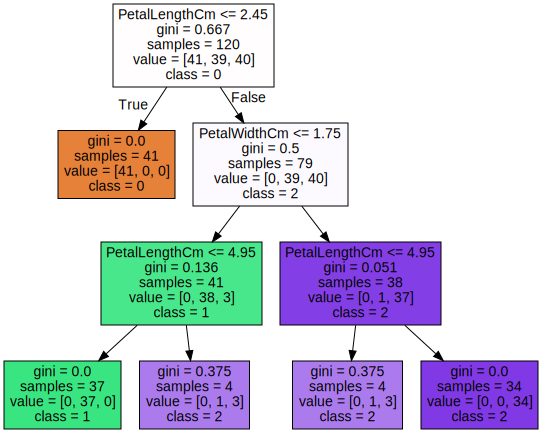

In [209]:
labels = X_dataset.columns
graph = Source(tree.export_graphviz(clf_gini ,feature_names = labels, class_names = Y_dataset.unique(), max_depth = 4, filled = True))
display(SVG(graph.pipe(format='svg')))